# Pre Procesamiento de tweets

ya que tenemos los tweets descargados de cada uno de los candidatos, vamos a realizar un preprocesamiento de los datos a fin de limpiarlos, normalizarlos y estandarizarlos.

- las fechas quedarán en formato yyyy-mm-dd
- todo estará en minusculas
- solo se trabajará con palabras


In [228]:
# Importamos librerias requeridas

from matplotlib.colors import LinearSegmentedColormap
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
from os import path

import matplotlib.pyplot as plt
import pandas as pd
import re 
import spacy
import numpy as np
import seaborn as sns

dark_blue_colors = ['#012a4a', 
                    '#013a63',
                    '#01497c',
                    '#014f86',
                    '#2a6f97',
                    '#2c7da0',
                    '#468faf',
                    '#61a5c2',
                    '#89c2d9',
                    '#a9d6e5']

c_light_blue = ['#0d47a1',
              '#1565c0',
              '#1976d2',
              '#1e88e5',
               '#2196f3']

c_heat_blue = ['#caf0f8',
               '#ade8f4',
               '#90e0ef',
               '#48cae4',
               '#00b4d8',
               '#0096c7',
               '#0077b6',
               '#023e8a',
               '#03045e']

dark_blue=sns.set_palette(sns.color_palette(dark_blue_colors))
light_blue = sns.set_palette(sns.color_palette(c_light_blue))

cmap_light_blue = ['#0d47a1', '#1976d2', '#2196f3', '#90caf9', '#bbdefb']
ligth_blue_cmap = LinearSegmentedColormap.from_list("mycmap", cmap_light_blue)

twitter_mask = np.array(Image.open('../src/twitter_logo.png'))

In [229]:
nlp = spacy.load('es_core_news_lg')


In [230]:
#Se crean funciones auxiliares para el proces

def cleantext(text):
    txt_mod = ""
    text = re.sub(r'(https?://)?(www\.)?([a-zA-Z0-9_%]*)\b\.[a-z]{2,4}(\.[a-z]{2})?((/[a-zA-Z0-9_%]*)+)?(\.[a-z]*)?', '', text)
    text = re.sub(r'@[A-Za-z09]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/?', '', text)
    text = text.replace('\n', '')
    text = text.replace('.', ' ')
    text = text.replace(',', ' ')
    text = re.sub(r't.co+', '', text)
    
    
    for word in text.split(' '):
        if len(txt_mod) == 0:
            txt_mod = word.lower().strip()
        else:
            txt_mod = txt_mod+' '+word.lower().strip()
                
    return txt_mod

def genera_texto_tweets(lista_tweets):
    """Concatena todos los tweets de la lista
    para crear un solo cuerpo de texto con todos los
    tweets generados.

    Args:
        lista_tweets (_type_): lista con los tweets 

    Returns:
        string: un texto con todos los tweets 
    """
    text = ""
    
    for tweet in lista_tweets:
        text = text+' '+tweet+'\n'
        
    return text

In [231]:
#Cargamos los dataframes de los tweets originales descargados

df_tweets_petro = pd.read_csv('./data/tweets_petro.csv', sep='|')
df_tweets_petro = df_tweets_petro[['id',
                                   'texto',
                                   'fecha']]
df_tweets_petro = df_tweets_petro[:1700]

df_tweets_fajardo = pd.read_csv('./data/tweets_sergio.csv', sep='|')
df_tweets_fajardo = df_tweets_fajardo[['id',
                                       'texto',
                                       'fecha']]
df_tweets_fajardo = df_tweets_fajardo[:1700]

df_tweets_rodolfo = pd.read_csv('./data/tweets_rodolfo.csv', sep='|')
df_tweets_rodolfo = df_tweets_rodolfo[['id',
                                       'texto',
                                       'fecha']]
df_tweets_rodolfo = df_tweets_rodolfo[:1700]

df_tweets_federico = pd.read_csv('./data/tweets_fico.csv', sep='|')
df_tweets_federico = df_tweets_federico[['id',
                                         'texto',
                                         'fecha']]
df_tweets_federico = df_tweets_federico[:1700]

In [232]:
df_tweets_petro.columns = ['id', 'tweet', 'fecha_hora']
df_tweets_fajardo.columns = ['id', 'tweet', 'fecha_hora']
df_tweets_rodolfo.columns = ['id', 'tweet', 'fecha_hora']
df_tweets_federico.columns = ['id', 'tweet', 'fecha_hora']

In [233]:
#Se aplican funciones de limpieza al cada dataframe y se guarda el texto procesado.

df_tweets_petro['tweet'] = df_tweets_petro['tweet'].apply(cleantext)
df_tweets_petro.to_csv('./data/tweets_petro_clean.csv')

df_tweets_fajardo['tweet'] = df_tweets_fajardo['tweet'].apply(cleantext)
df_tweets_fajardo.to_csv('./data/tweets_fajardo_clean.csv')

df_tweets_rodolfo['tweet'] = df_tweets_rodolfo['tweet'].apply(cleantext)
df_tweets_rodolfo.to_csv('./data/tweets_rodolfo_clean.csv')

df_tweets_federico['tweet'] = df_tweets_federico['tweet'].apply(cleantext)
df_tweets_federico.to_csv('./data/tweets_fico_clean.csv')

In [234]:
df_tweets_petro['fecha'] = pd.to_datetime(df_tweets_petro['fecha_hora']).dt.date
df_tweets_fajardo['fecha'] = pd.to_datetime(df_tweets_fajardo['fecha_hora']).dt.date
df_tweets_rodolfo['fecha'] = pd.to_datetime(df_tweets_rodolfo['fecha_hora']).dt.date
df_tweets_federico['fecha'] = pd.to_datetime(df_tweets_federico['fecha_hora']).dt.date

In [235]:
df_estadisticas_petro = df_tweets_petro[['fecha', 'id']]
df_estadisticas_fajardo = df_tweets_fajardo[['fecha', 'id']]
df_estadisticas_rodolfo = df_tweets_rodolfo[['fecha', 'id']]
df_estadisticas_federico = df_tweets_federico[['fecha', 'id']]

df_estadisticas_petro = df_estadisticas_petro.groupby('fecha').count()
df_estadisticas_petro['usuario'] = '@petrogustavo'
df_estadisticas_fajardo = df_estadisticas_fajardo.groupby('fecha').count()
df_estadisticas_fajardo['usuario'] = '@sergio_fajardo'
df_estadisticas_rodolfo= df_estadisticas_rodolfo.groupby('fecha').count()
df_estadisticas_rodolfo['usuario'] = '@ingrodolfohdez'
df_estadisticas_federico = df_estadisticas_federico.groupby('fecha').count()
df_estadisticas_federico['usuario'] = '@ficogutierrez'


In [236]:
df_estadisticas_twitter = pd.concat([df_estadisticas_petro,
                                    df_estadisticas_fajardo,
                                    df_estadisticas_rodolfo,
                                    df_estadisticas_federico])

df_estadisticas_twitter.to_csv('./data/df_estadisticas_tweets_x_usuario.csv')

# Generación WordCloud tweets por candidato

Se desarrolla una nube de palabras con los tweets de cada uno de los candidatos, esto permitirá ver cuales son las palabras mas usadas de los candidatos en sus cuentas de twitter.

In [237]:
from spacy.lang.es.stop_words import STOP_WORDS

In [238]:
#Generemos una lista con las palabras stop words del idioma español desde spacy
es_stop_words = list(STOP_WORDS)

es_stop_words.append('ya')

In [239]:
#Vamos a construir un string con todos los tweets de cada uno de los candidatos, esto con el objetivo de poder identificar las palabras
#mas usadas por cada uno en todos los tweets que tenemos.

texto_tweets_petro = genera_texto_tweets(list(df_tweets_petro['tweet']))
texto_tweets_fajardo = genera_texto_tweets(list(df_tweets_fajardo['tweet']))
texto_tweets_rodolfo = genera_texto_tweets(list(df_tweets_rodolfo['tweet']))
texto_tweets_federico = genera_texto_tweets(list(df_tweets_federico['tweet']))

In [240]:
#Generamos objeto doc spacy para los trinos de los candidatos

doc_spacy_petro = nlp(texto_tweets_petro)
doc_spacy_fajardo = nlp(texto_tweets_fajardo)
doc_spacy_rodolfo = nlp(texto_tweets_rodolfo)
doc_spacy_federico = nlp(texto_tweets_federico)


In [241]:
#generamos listados con las palabras mas usadas por los candidatos en sus tweets
#se realizan ajustes en el contenido eliminando caracteres de salto de linea.

lis_palabras_petro = []
lis_palabras_fajardo = []
lis_palabras_rodolfo = []
lis_palabras_federico = []


for token in doc_spacy_petro:
    lis_palabras_petro.append(token.lemma_)
    
for token in doc_spacy_fajardo:
    lis_palabras_fajardo.append(token.lemma_)
    
for token in doc_spacy_rodolfo:
    lis_palabras_rodolfo.append(token.lemma_)
    
for token in doc_spacy_federico:
    lis_palabras_federico.append(token.lemma_)
    
#Eliminamos las stop words
lis_palabras_petro = [word for word in lis_palabras_petro if word not in es_stop_words]
lis_palabras_petro = [word for word in lis_palabras_petro if word not in [' ', ' \n', ' \n ', '\n']]
lis_palabras_petro = [word for word in lis_palabras_petro if word.isalpha()]
lis_palabras_petro = [word for word in lis_palabras_petro if len(word) > 2]

lis_palabras_fajardo = [word for word in lis_palabras_fajardo if word not in es_stop_words]
lis_palabras_fajardo = [word for word in lis_palabras_fajardo if word not in [' ', ' \n', ' \n ', '\n']]
lis_palabras_fajardo = [word for word in lis_palabras_fajardo if word.isalpha()]
lis_palabras_fajardo = [word for word in lis_palabras_fajardo if len(word) > 2]

lis_palabras_rodolfo = [word for word in lis_palabras_rodolfo if word not in es_stop_words]
lis_palabras_rodolfo = [word for word in lis_palabras_rodolfo if word not in [' ', ' \n', ' \n ', '\n']]
lis_palabras_rodolfo = [word for word in lis_palabras_rodolfo if word.isalpha()]
lis_palabras_rodolfo = [word for word in lis_palabras_rodolfo if len(word) > 2]

lis_palabras_federico = [word for word in lis_palabras_federico if word not in es_stop_words]
lis_palabras_federico = [word for word in lis_palabras_federico if word not in [' ', ' \n', ' \n ', '\n']]
lis_palabras_federico = [word for word in lis_palabras_federico if word.isalpha()]
lis_palabras_federico = [word for word in lis_palabras_federico if len(word) > 2]

In [242]:
#se crea un contador de palabras por cada una de las listas de palabras

cnt_palabras_tweets_petro = Counter(lis_palabras_petro)
cnt_palabras_tweets_fajardo = Counter(lis_palabras_fajardo)
cnt_palabras_tweets_rodolfo = Counter(lis_palabras_rodolfo)
cnt_palabras_tweets_federico = Counter(lis_palabras_federico)

## WordCloud Gustavo Petro

(-0.5, 2499.5, 2030.5, -0.5)

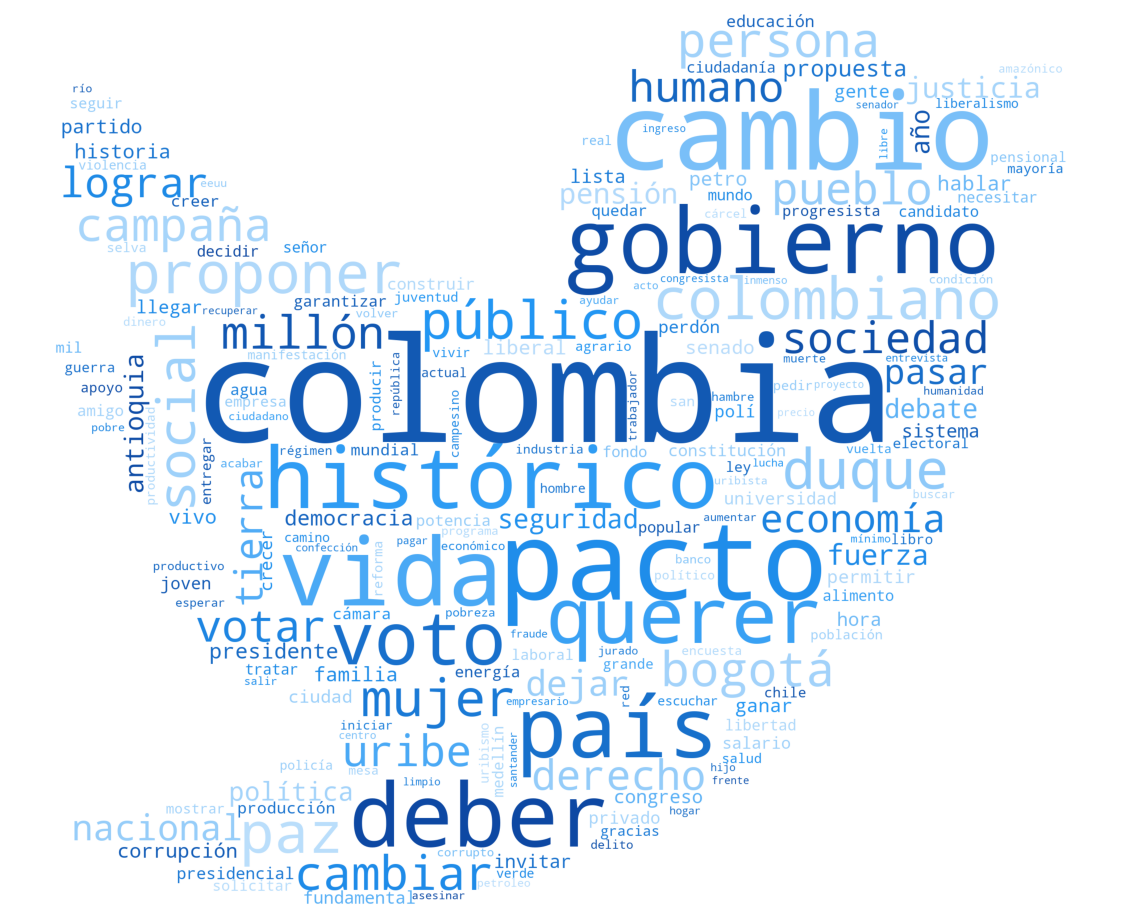

In [243]:
#Creación WordCloud de gustavo petro 

wrdCloud = WordCloud(width=3000,
                     height=3000,
                     max_words=200,
                     collocations=False,
                     background_color='white',
                     random_state=1,
                     mask = twitter_mask,
                     stopwords=es_stop_words,
                     colormap=ligth_blue_cmap).generate_from_frequencies(cnt_palabras_tweets_petro)

plt.figure(figsize=(20,20))
plt.imshow(wrdCloud)
plt.axis('off')

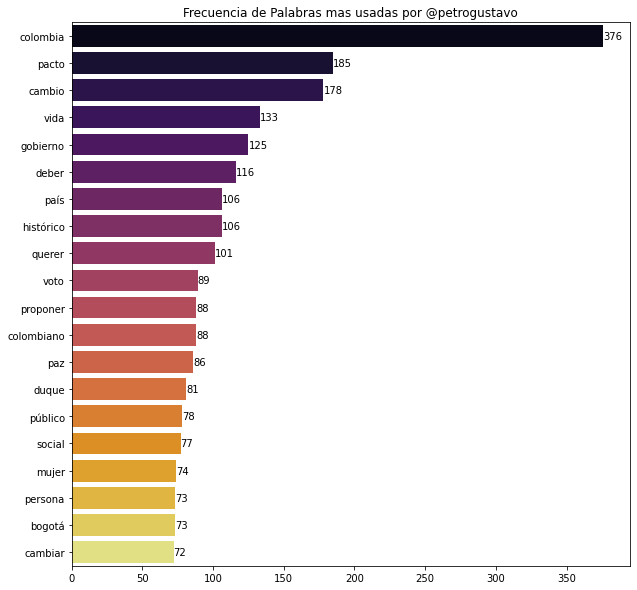

In [244]:
plt.figure(figsize=(10,10))
plt.title("Frecuencia de Palabras mas usadas por @petrogustavo")
plt.xlabel = "Palabra"
plt.ylabel = "Frecuencia"

#Generamos gráfico de barras con las primeras 20 palabras mas usadas de petro

most_common_petro = cnt_palabras_tweets_petro.most_common(20)

x_petro = []
y_petro = []

for tupla in most_common_petro:
    x_petro.append(tupla[0])
    y_petro.append(tupla[1])
    
p_bar = sns.barplot(x=y_petro,
            y=x_petro,
            palette='inferno',
            orient='h')

for i in p_bar.containers:
    p_bar.bar_label(i,)
    
plt.show()


## WordCloud Sergio Fajardo

(-0.5, 2499.5, 2030.5, -0.5)

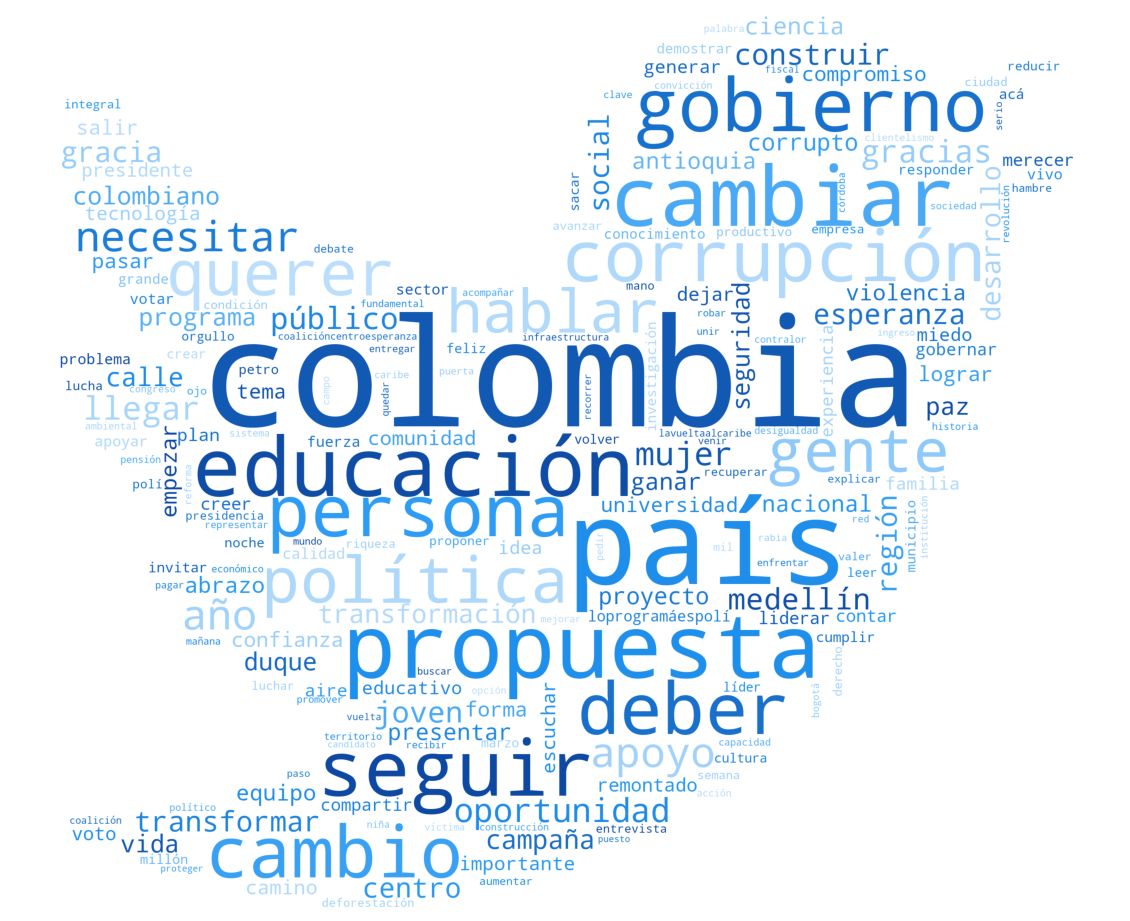

In [245]:
wrdCloud = WordCloud(width=3000,
                     height=3000,
                     max_words=200,
                     collocations=False,
                     background_color='white',
                     random_state=1,
                     mask = twitter_mask,
                     colormap=ligth_blue_cmap).generate_from_frequencies(cnt_palabras_tweets_fajardo)

plt.figure(figsize=(20,20))
plt.imshow(wrdCloud)
plt.axis('off')

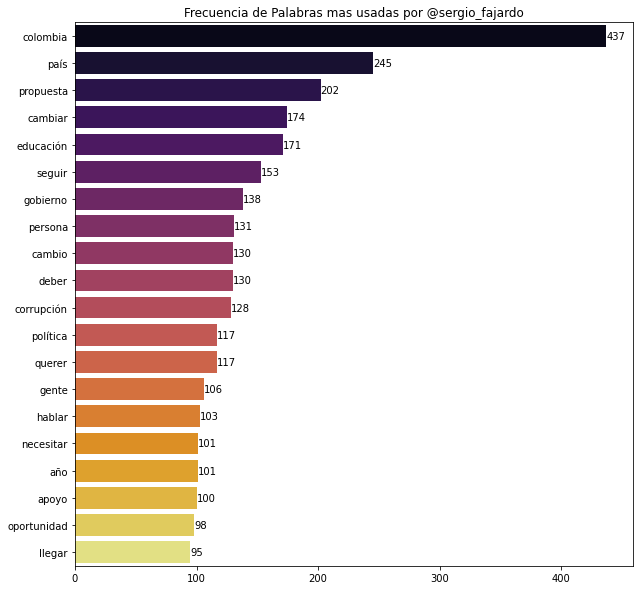

In [246]:
plt.figure(figsize=(10,10))
plt.title("Frecuencia de Palabras mas usadas por @sergio_fajardo")
plt.xlabel = "Palabra"
plt.ylabel = "Frecuencia"

#Generamos gráfico de barras con las primeras 20 palabras mas usadas de petro

most_common_fajardo = cnt_palabras_tweets_fajardo.most_common(20)

x_fajardo = []
y_fajardo = []

for tupla in most_common_fajardo:
    x_fajardo.append(tupla[0])
    y_fajardo.append(tupla[1])
    
p_bar = sns.barplot(x=y_fajardo,
            y=x_fajardo,
            palette='inferno',
            orient='h')

for i in p_bar.containers:
    p_bar.bar_label(i,)
    

## WordCloud Rodolfo Hernadez

(-0.5, 2499.5, 2030.5, -0.5)

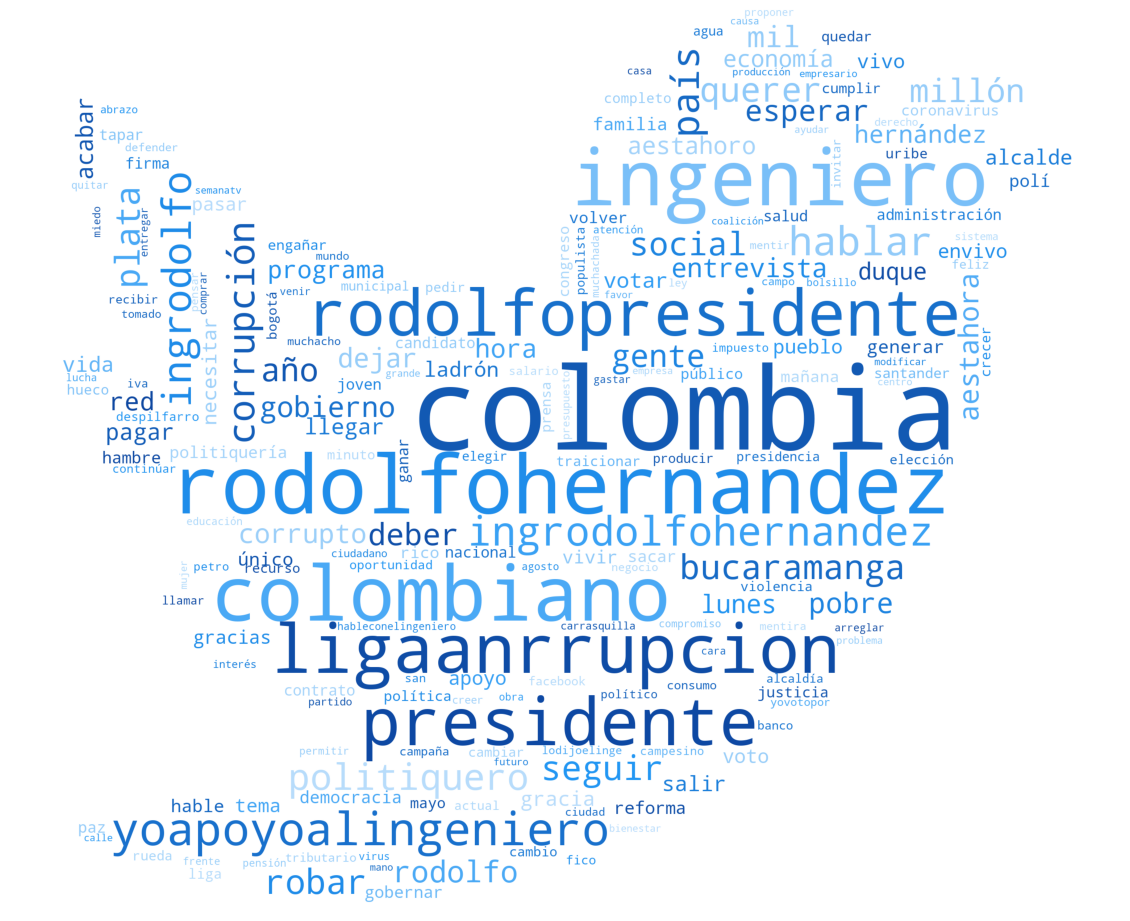

In [247]:
wrdCloud = WordCloud(width=3000,
                     height=3000,
                     max_words=200,
                     collocations=False,
                     background_color='white',
                     random_state=1,
                     mask = twitter_mask,
                     colormap=ligth_blue_cmap).generate_from_frequencies(cnt_palabras_tweets_rodolfo)

plt.figure(figsize=(20,20))
plt.imshow(wrdCloud)
plt.axis('off')

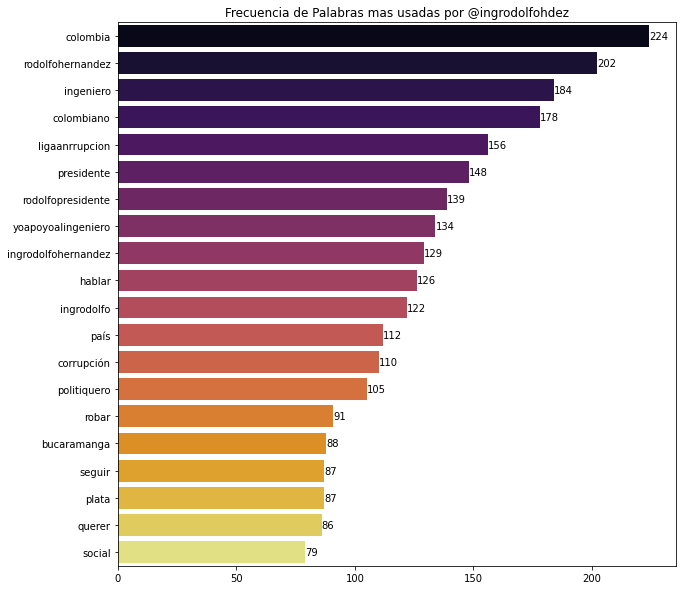

In [248]:
plt.figure(figsize=(10,10))
plt.title("Frecuencia de Palabras mas usadas por @ingrodolfohdez")
plt.xlabel = "Palabra"
plt.ylabel = "Frecuencia"

#Generamos gráfico de barras con las primeras 20 palabras mas usadas de petro

most_common_rodolfo = cnt_palabras_tweets_rodolfo.most_common(20)

x_rodolfo = []
y_rodolfo = []

for tupla in most_common_rodolfo:
    x_rodolfo.append(tupla[0])
    y_rodolfo.append(tupla[1])
    
p_bar = sns.barplot(x=y_rodolfo,
            y=x_rodolfo,
            palette='inferno',
            orient='h')

for i in p_bar.containers:
    p_bar.bar_label(i,)
    

## WordCloud Federico Gutierrez

(-0.5, 2499.5, 2030.5, -0.5)

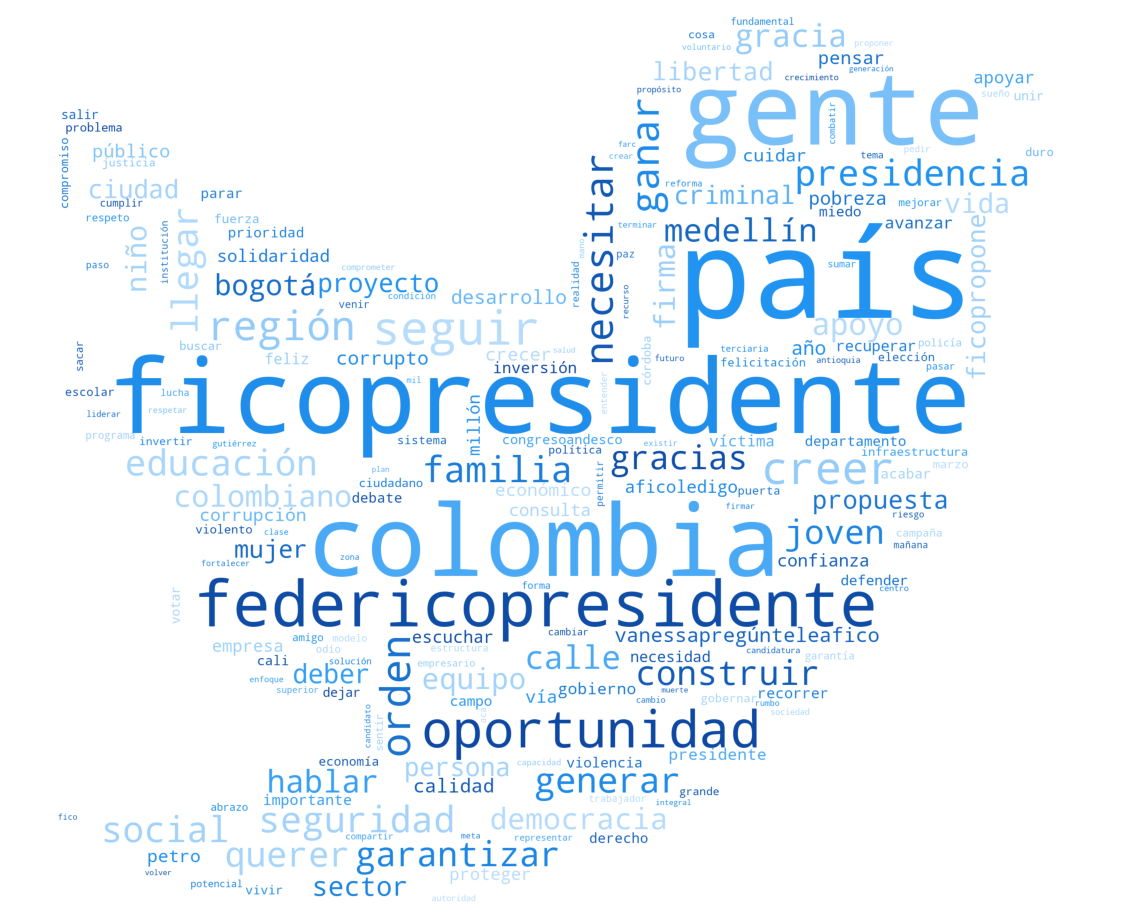

In [249]:
wrdCloud = WordCloud(width=3000,
                     height=3000,
                     max_words=200,
                     collocations=False,
                     background_color='white',
                     random_state=1,
                     mask = twitter_mask,
                     colormap=ligth_blue_cmap).generate_from_frequencies(cnt_palabras_tweets_federico)

plt.figure(figsize=(20,20))
plt.imshow(wrdCloud)
plt.axis('off')

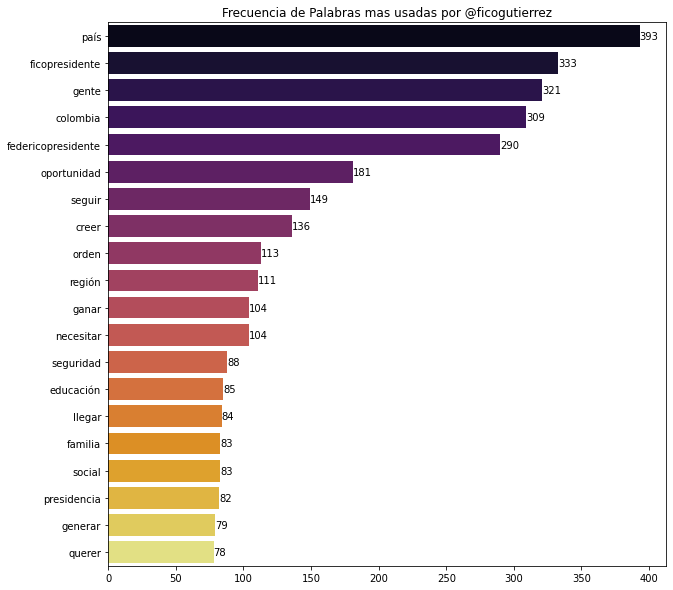

In [250]:
plt.figure(figsize=(10,10))
plt.title("Frecuencia de Palabras mas usadas por @ficogutierrez")
plt.xlabel = "Palabra"
plt.ylabel = "Frecuencia"

#Generamos gráfico de barras con las primeras 20 palabras mas usadas de petro

most_common_federico = cnt_palabras_tweets_federico.most_common(20)

x_federico = []
y_federico = []

for tupla in most_common_federico:
    x_federico.append(tupla[0])
    y_federico.append(tupla[1])
    
p_bar = sns.barplot(x=y_federico,
            y=x_federico,
            palette='inferno',
            orient='h')

for i in p_bar.containers:
    p_bar.bar_label(i,)

# Análisis de sentimiento tweets candidatos

se realizará un proceso de analisis de sentimiento sobre los tweets escritos por cada candidato, esto con el objetivo de identificar la positividad, negatividad o neutralidad de cada texto. Para esto usaremos la libreria pysentimiento entranada con palabras del idioma español.

In [251]:
from pysentimiento import create_analyzer

sent_analyzer = create_analyzer(task='sentiment', lang='es')


loading file https://huggingface.co/pysentimiento/robertuito-sentiment-analysis/resolve/main/tokenizer.json from cache at /Users/fredericksalazar/.cache/huggingface/transformers/47dd2d3180a6186d30715516321375322e3a84d5e4656762e083091bbb5d5dc4.0843b07596b388e054bae078721182b4846b9e28a7bbf04d7079b274f8613ae3
loading file https://huggingface.co/pysentimiento/robertuito-sentiment-analysis/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/pysentimiento/robertuito-sentiment-analysis/resolve/main/special_tokens_map.json from cache at /Users/fredericksalazar/.cache/huggingface/transformers/25e0e805456d2786a12b70b86278c6e839d19958cb4f541ee1f78621140098f7.0dc5b1041f62041ebbd23b1297f2f573769d5c97d8b7c28180ec86b8f6185aa8
loading file https://huggingface.co/pysentimiento/robertuito-sentiment-analysis/resolve/main/tokenizer_config.json from cache at /Users/fredericksalazar/.cache/huggingface/transformers/4fdf9a5a8e0a6023e1a9cdef62921158c3db9545e73f8dc0f46340a21bbb

In [252]:
#Creamos un proceso para asignar a cada tweet una etiqueta de sentimiento que puede ser 
#positiva, negativa o neutral tambien almacenaremos el valor de calculo asignado.
lis_sentimiento_tweets_petro = []

#Se calcula el sentimiento de cada uno de los tweets
res_sent_tweets_petro = sent_analyzer.predict(df_tweets_petro['tweet'])

for sent in res_sent_tweets_petro:
    lis_sentimiento_tweets_petro.append([sent.output, sent.probas['POS'], sent.probas['NEU'], sent.probas['NEG']])
    
df_sent_tweets_petro = pd.DataFrame(lis_sentimiento_tweets_petro)
df_sent_tweets_petro.columns = ['sentimiento', 'positividad', 'neutralidad', 'negatividad']
df_tweets_petro = pd.concat([df_tweets_petro, df_sent_tweets_petro], axis=1)

  0%|          | 0/54 [00:00<?, ?ba/s]

The following columns in the test set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1700
  Batch size = 32


  0%|          | 0/54 [00:00<?, ?it/s]

<AxesSubplot:xlabel='sentimiento', ylabel='Count'>

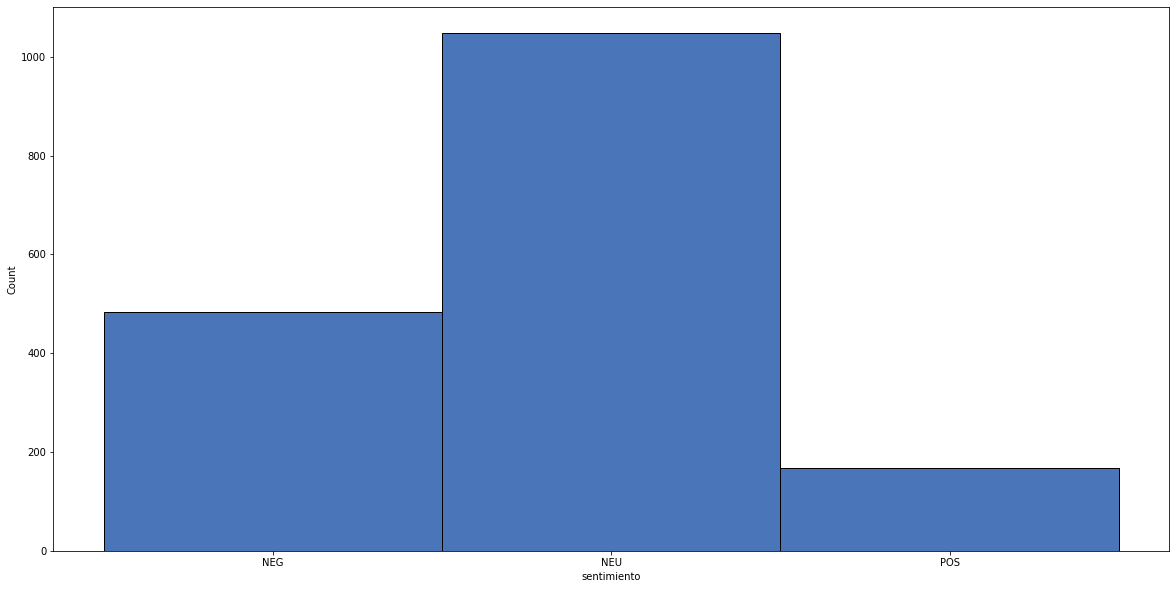

In [253]:
plt.figure(figsize=(20,10))

sns.histplot(data = df_tweets_petro,
            x = 'sentimiento')

<AxesSubplot:ylabel='id'>

<Figure size 720x720 with 0 Axes>

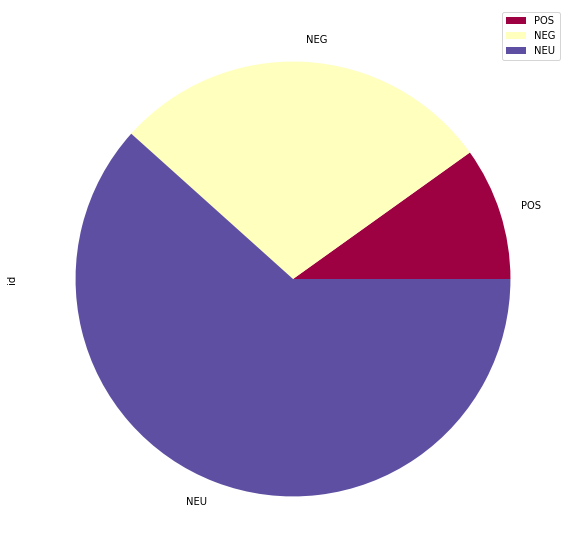

In [254]:
plt.figure(figsize=(10,10))
df_tweets_petro.groupby('sentimiento').count().sort_values(by='id', ascending=True).plot.pie(y='id',
                                                                                             figsize=(10,10),
                                                                                             colormap='Spectral')


In [255]:
#Creamos un proceso para asignar a cada tweet una etiqueta de sentimiento que puede ser 
#positiva, negativa o neutral tambien almacenaremos el valor de calculo asignado.
lis_sentimiento_tweets_fajardo = []

#Se calcula el sentimiento de cada uno de los tweets
res_sent_tweets_fajardo = sent_analyzer.predict(df_tweets_fajardo['tweet'])

for sent in res_sent_tweets_fajardo:
    lis_sentimiento_tweets_fajardo.append([sent.output, sent.probas['POS'], sent.probas['NEU'], sent.probas['NEG']])
    
df_sent_tweets_fajardo = pd.DataFrame(lis_sentimiento_tweets_fajardo)
df_sent_tweets_fajardo.columns = ['sentimiento', 'positividad', 'neutralidad', 'negatividad']
df_tweets_fajardo = pd.concat([df_tweets_fajardo, df_sent_tweets_fajardo], axis=1)

  0%|          | 0/54 [00:00<?, ?ba/s]

The following columns in the test set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1700
  Batch size = 32


<AxesSubplot:xlabel='sentimiento', ylabel='Count'>

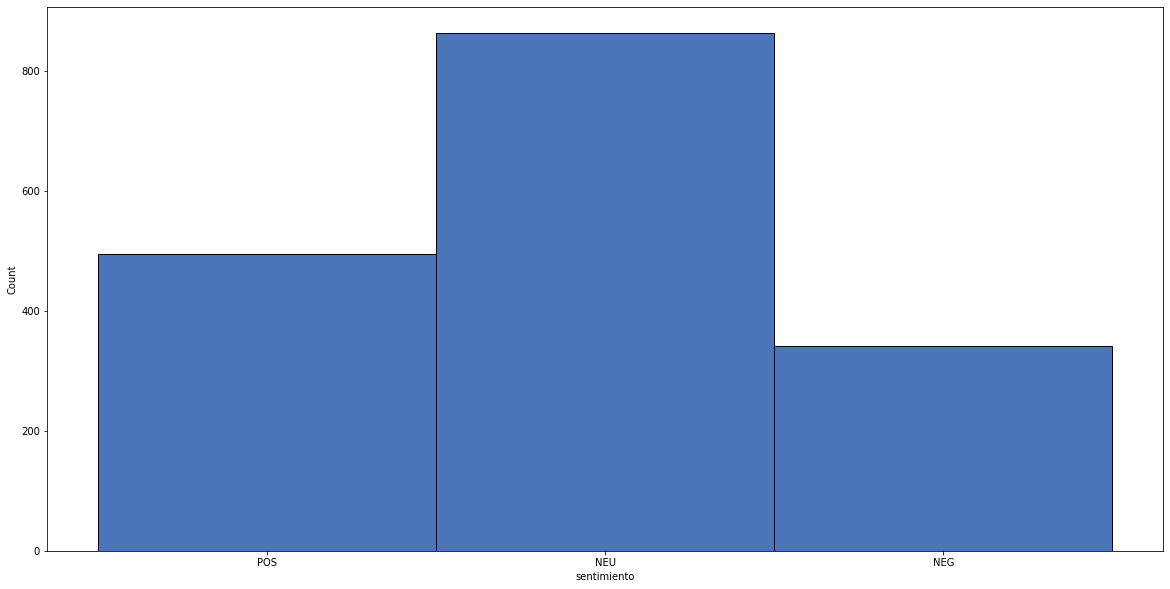

In [256]:
plt.figure(figsize=(20,10))

sns.histplot(data = df_tweets_fajardo,
            x = 'sentimiento')

In [257]:
#Creamos un proceso para asignar a cada tweet una etiqueta de sentimiento que puede ser 
#positiva, negativa o neutral tambien almacenaremos el valor de calculo asignado.
lis_sentimiento_tweets_rodolfo = []

#Se calcula el sentimiento de cada uno de los tweets
res_sent_tweets_rodolfo = sent_analyzer.predict(df_tweets_rodolfo['tweet'])

for sent in res_sent_tweets_rodolfo:
    lis_sentimiento_tweets_rodolfo.append([sent.output, sent.probas['POS'], sent.probas['NEU'], sent.probas['NEG']])
    
df_sent_tweets_rodolfo = pd.DataFrame(lis_sentimiento_tweets_rodolfo)
df_sent_tweets_rodolfo.columns = ['sentimiento', 'positividad', 'neutralidad', 'negatividad']
df_tweets_rodolfo = pd.concat([df_tweets_rodolfo, df_sent_tweets_rodolfo], axis=1)

  0%|          | 0/54 [00:00<?, ?ba/s]

The following columns in the test set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1700
  Batch size = 32


<AxesSubplot:xlabel='sentimiento', ylabel='Count'>

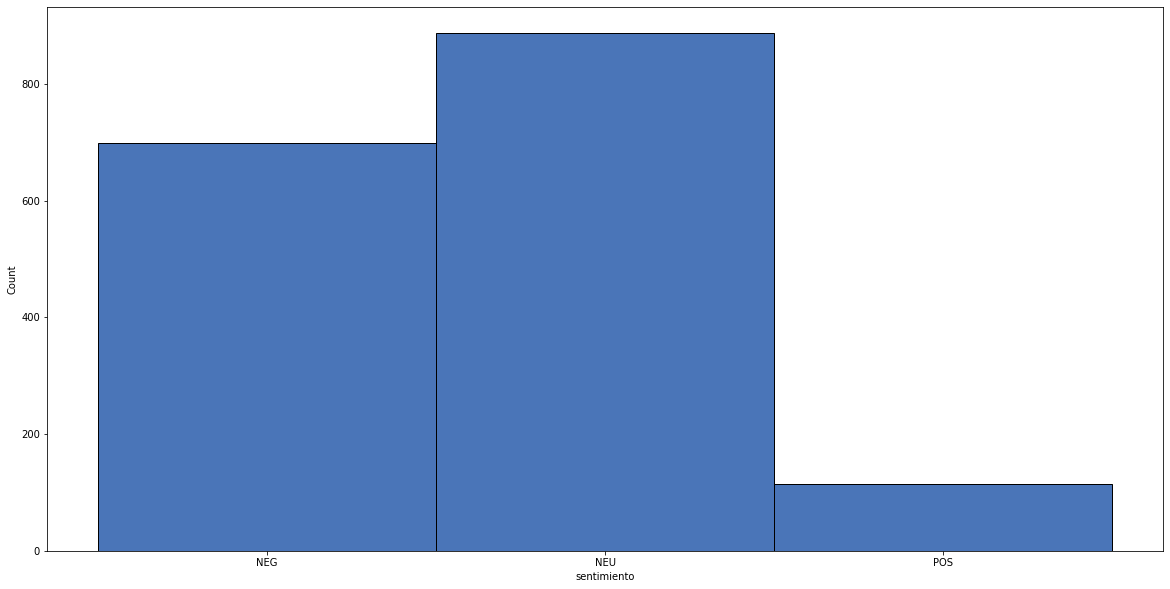

In [258]:
plt.figure(figsize=(20,10))

sns.histplot(data = df_tweets_rodolfo,
            x = 'sentimiento')

In [259]:
#Creamos un proceso para asignar a cada tweet una etiqueta de sentimiento que puede ser 
#positiva, negativa o neutral tambien almacenaremos el valor de calculo asignado.
lis_sentimiento_tweets_federico = []

#Se calcula el sentimiento de cada uno de los tweets
res_sent_tweets_federico = sent_analyzer.predict(df_tweets_federico['tweet'])

for sent in res_sent_tweets_federico:
    lis_sentimiento_tweets_federico.append([sent.output, sent.probas['POS'], sent.probas['NEU'], sent.probas['NEG']])
    
df_sent_tweets_federico = pd.DataFrame(lis_sentimiento_tweets_federico)
df_sent_tweets_federico.columns = ['sentimiento', 'positividad', 'neutralidad', 'negatividad']
df_tweets_federico = pd.concat([df_tweets_federico, df_sent_tweets_federico], axis=1)

  0%|          | 0/54 [00:00<?, ?ba/s]

The following columns in the test set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1700
  Batch size = 32


<AxesSubplot:xlabel='sentimiento', ylabel='Count'>

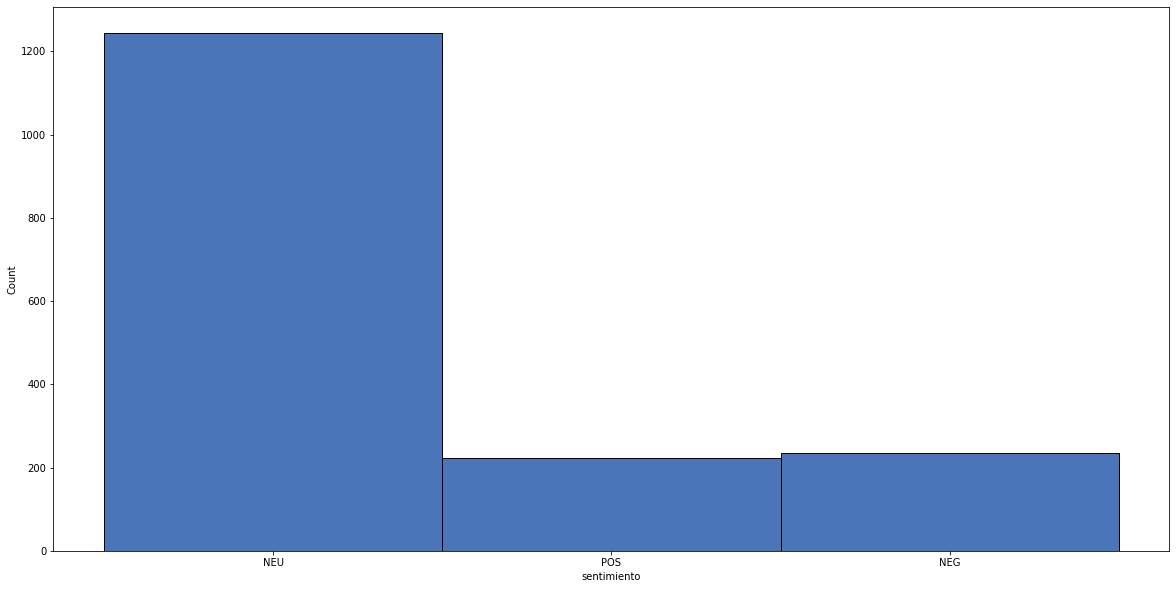

In [260]:
plt.figure(figsize=(20,10))

sns.histplot(data = df_tweets_federico,
            x = 'sentimiento')

In [261]:
df_tweets_petro['usuario'] = '@petrogustavo'
df_tweets_fajardo['usuario'] = '@sergio_fajardo'
df_tweets_rodolfo['usuario'] = '@ingrodolfohdez'
df_tweets_federico['usuario'] = '@ficogutierrez'

df_tweets_petro = df_tweets_petro[['id', 'fecha', 'fecha_hora', 'sentimiento', 'usuario']]
df_tweets_fajardo = df_tweets_fajardo[['id', 'fecha', 'fecha_hora', 'sentimiento', 'usuario']]
df_tweets_rodolfo = df_tweets_rodolfo[['id', 'fecha', 'fecha_hora', 'sentimiento', 'usuario']]
df_tweets_federico = df_tweets_federico[['id', 'fecha', 'fecha_hora', 'sentimiento', 'usuario']]

df_tweets_petro.to_csv('./data/archivos_procesados/df_tweets_petro.csv')
df_tweets_fajardo.to_csv('./data/archivos_procesados/df_tweets_fajardo.csv')
df_tweets_rodolfo.to_csv('./data/archivos_procesados/df_tweets_rodolfo.csv')
df_tweets_federico.to_csv('./data/archivos_procesados/df_tweets_federico.csv')

In [262]:
df_tweets = pd.concat([df_tweets_petro,
                       df_tweets_fajardo,
                       df_tweets_rodolfo,
                       df_tweets_federico])

In [263]:
df_tweets

,id,fecha,fecha_hora,sentimiento,usuario
0,1522417825868046336,2022-05-06,2022-05-06 03:27:49+00:00,NEG,@petrogustavo
1,1522416660522717184,2022-05-06,2022-05-06 03:23:11+00:00,NEU,@petrogustavo
2,1522375888758841344,2022-05-06,2022-05-06 00:41:10+00:00,NEG,@petrogustavo
3,1522369713313136644,2022-05-06,2022-05-06 00:16:38+00:00,NEU,@petrogustavo
4,1522351847389990913,2022-05-05,2022-05-05 23:05:39+00:00,NEU,@petrogustavo
...,...,...,...,...,...
1695,1433457316481966082,2021-09-02,2021-09-02 15:50:31+00:00,POS,@ficogutierrez
1696,1433449516607344640,2021-09-02,2021-09-02 15:19:31+00:00,POS,@ficogutierrez
1697,1433420642792075266,2021-09-02,2021-09-02 13:24:47+00:00,POS,@ficogutierrez
1698,1433236582816002053,2021-09-02,2021-09-02 01:13:24+00:00,POS,@ficogutierrez


In [264]:
#Exportamos los archivos procesados para su analisis y graficación en apache superset

df_tweets.to_csv('./data/archivos_procesados/df_tweets_candidatos.csv', index=False)